In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARMA
from eda.utils import *
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
filename = '../data/train.csv'
train_df_raw = pd.read_csv(filename)
print(train_df_raw.shape)
print(train_df_raw.dtypes)
print(train_df_raw.head())
print(train_df_raw.tail())

train_df = train_df_raw.copy()
train_df = train_df.set_index('date')
train_df.index = pd.to_datetime(train_df.index)

(913000, 4)
date     object
store     int64
item      int64
sales     int64
dtype: object
         date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10
              date  store  item  sales
912995  2017-12-27     10    50     63
912996  2017-12-28     10    50     59
912997  2017-12-29     10    50     74
912998  2017-12-30     10    50     62
912999  2017-12-31     10    50     82


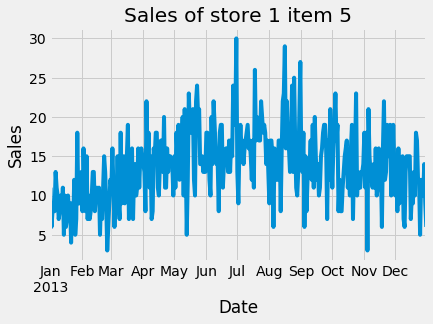

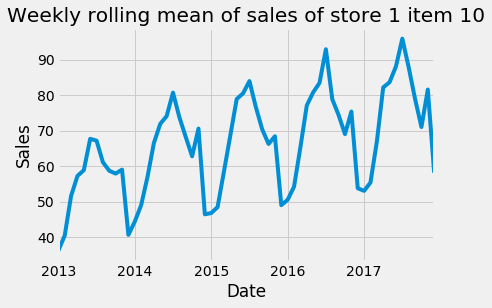

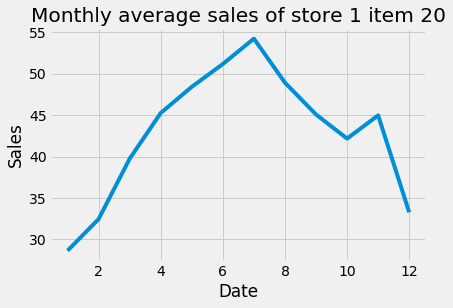

store 1 item 1 summary:
max        50.000000
mean       19.971522
sum     36468.000000
Name: sales, dtype: float64


In [5]:
plot_store_item(train_df, store = 1, item = 5, t_start = '2013-01', t_end = '2013-12')

plot_monthly_average(train_df, store = 1, item = 10)

plot_monthly_variation(train_df, store = 1, item = 20)

store_item_stat = summary_stats(train_df, store = 1, item = 1)

In [ ]:
#subset data, monthly mean 
df_sub_monthly_mean = df_subset_monthly_mean(train_df, store = 1, item = 10)

In [ ]:
# Plot the autocorrelation
plot_acf(df_sub_monthly_mean, alpha = 1, lags=12)
plt.show()

In [ ]:
#Fit AR model
mod = ARMA(df_sub_monthly_mean, order = (10,0))
result = mod.fit()
print(result.summary())
print(result.params)

#Forecasting
result.plot_predict(start = '2018-01-31', end = '2018-12-31')
plt.show()

# plot partial ACF (PACF)
plot_pacf(df_sub_monthly_mean, alpha = 1, lags=20)
plt.show()

# get Akaike  information creteria (AIC) and Bayesian information creteria (BIC)
print(result.aic)
print(result.bic)

In [ ]:
# MA model
mod = ARMA(df_sub_monthly_mean, order = (0,10)) # reverse order with AR model
result = mod.fit()
print(result.summary())
print(result.params)
result.plot_predict(start = '2018-01-31', end = '2018-12-31')
plt.show()

# random walk test

# transform to stationary

#train model

#make prediction